**Data Science Assignment: eCommerce Transactions Dataset**

***EDA of eCommerce Transactions***

In [138]:
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
%matplotlib inline

import scipy.stats as stats

import seaborn as sns

In [139]:
customers = pd.read_csv("Customers.csv")
og_c = customers.copy()
products = pd.read_csv("Products.csv")
og_p = products.copy()
transactions = pd.read_csv("Transactions.csv")
og_t = transactions.copy()

In [140]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [141]:
customers.describe(include='all')

,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2022-04-16
freq,1,1,59,3


In [142]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [143]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [144]:
products.describe(include='all')

,ProductID,ProductName,Category,Price
count,100,100,100,100.000000
unique,100,66,4,NaN
top,P001,ActiveWear Smartwatch,Books,NaN
freq,1,4,26,NaN
mean,NaN,NaN,NaN,267.551700
std,NaN,NaN,NaN,143.219383
min,NaN,NaN,NaN,16.080000
25%,NaN,NaN,NaN,147.767500
50%,NaN,NaN,NaN,292.875000
75%,NaN,NaN,NaN,397.090000


In [145]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB


In [146]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [147]:
transactions.describe(include='all')

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
count,1000,1000,1000,1000,1000.000000,1000.000000,1000.00000
unique,1000,199,100,1000,NaN,NaN,NaN
top,T00992,C0109,P059,2024-04-21 10:52:24,NaN,NaN,NaN
freq,1,11,19,1,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2.537000,689.995560,272.55407
std,NaN,NaN,NaN,NaN,1.117981,493.144478,140.73639
min,NaN,NaN,NaN,NaN,1.000000,16.080000,16.08000
25%,NaN,NaN,NaN,NaN,2.000000,295.295000,147.95000
50%,NaN,NaN,NaN,NaN,3.000000,588.880000,299.93000
75%,NaN,NaN,NaN,NaN,4.000000,1011.660000,404.40000


In [148]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


### Customer Sign up date & Region trends

In [149]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])

In [150]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB


In [180]:
# Get the minimum and maximum signup dates
min_date = customers['SignupDate'].min()
max_date = customers['SignupDate'].max()

print(f"Signup Date Range: {min_date} to {max_date}")


Signup Date Range: 2022-01-22 00:00:00 to 2024-12-28 00:00:00


Customer Distribution by Region:
Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


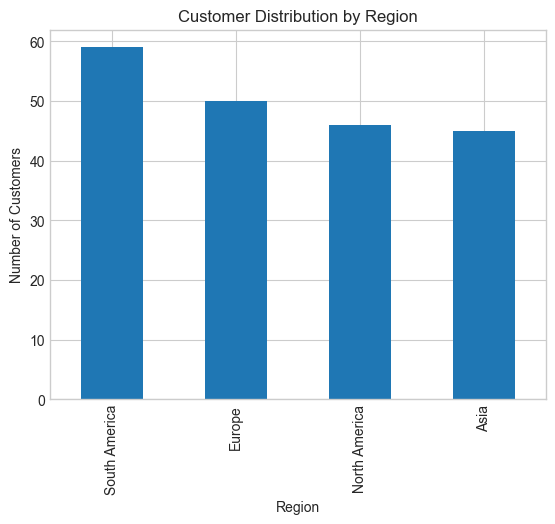

In [151]:
region_counts = customers['Region'].value_counts()
print("Customer Distribution by Region:")
print(region_counts)

# Visualization (if needed)
import matplotlib.pyplot as plt

region_counts.plot(kind='bar', title="Customer Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.show()


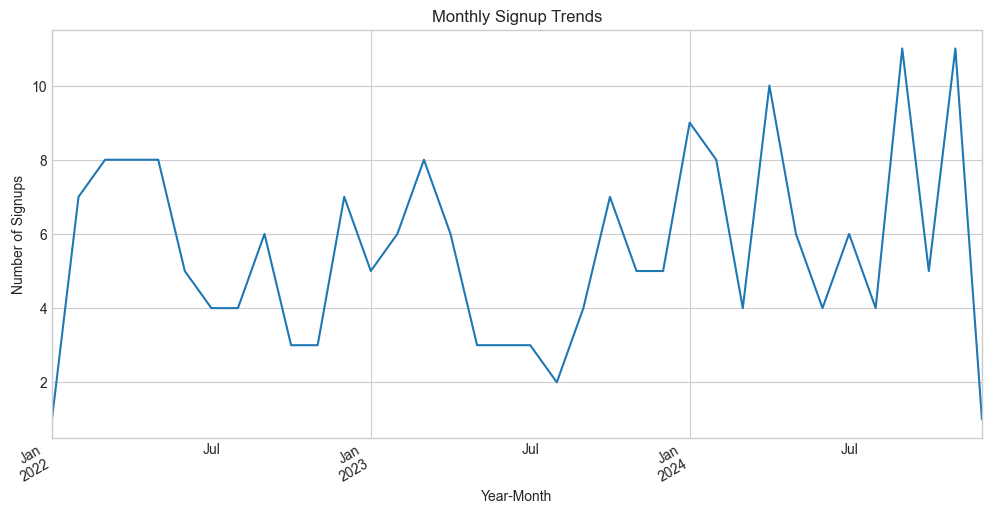

In [179]:
customers['SignupYearMonth'] = customers['SignupDate'].dt.to_period('M')

signup_trends = customers['SignupYearMonth'].value_counts().sort_index()
plt.figure(figsize=(12, 6))

signup_trends.plot(kind='line', title="Monthly Signup Trends")
plt.xlabel("Year-Month")
plt.ylabel("Number of Signups")
plt.gcf().autofmt_xdate()

plt.show()


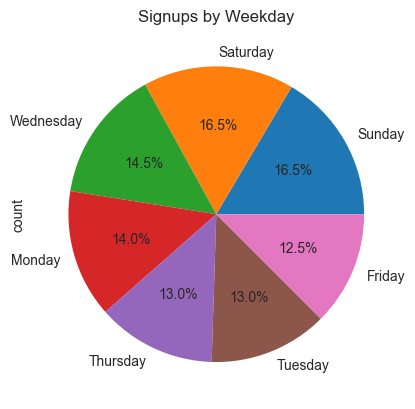

In [154]:
customers['SignupWeekday'] = customers['SignupDate'].dt.day_name()
weekday_counts = customers['SignupWeekday'].value_counts()

weekday_counts.plot(kind='pie', title="Signups by Weekday", autopct='%1.1f%%')
plt.show()


### Products trends

In [207]:
unique_product_ids = products['ProductID'].nunique()
unique_product_names = products['ProductName'].nunique()
unique_cat = products['Category'].nunique()


print("unique id:", unique_product_ids)
print("unique name:", unique_product_names)
print("categories:", unique_cat)

unique id: 100
unique name: 66
categories: 4


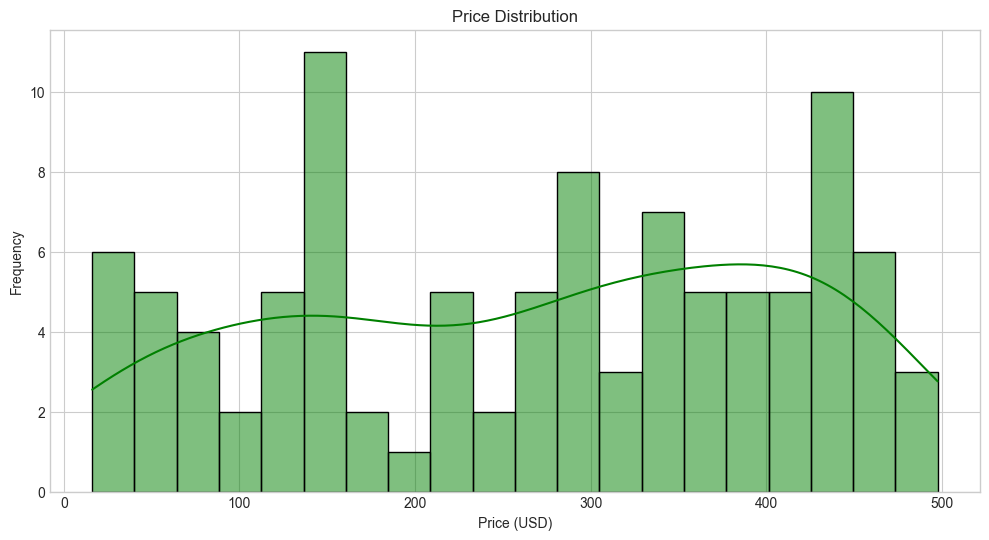

In [192]:
# Plotting the price distribution
plt.figure(figsize=(12,6))
sns.histplot(products['Price'], bins=20, kde=True, color='green')
plt.title("Price Distribution")
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")
plt.show()


In [156]:
category_counts = products['Category'].value_counts()
print("Product Count by Category:")
print(category_counts)


Product Count by Category:
Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64


### Transactions trends

In [161]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [162]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price            1000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 54.8+ KB


In [208]:
total_revenue = transactions['TotalValue'].sum()
print(f"Total Revenue: ${total_revenue:.2f}")

Total Revenue: $689995.56


In [164]:
top_selling_products = transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False)
print("Top Selling Products by Quantity:")
print(top_selling_products)

Top Selling Products by Quantity:
ProductID
P054    46
P059    46
P029    45
P048    43
P057    43
        ..
P044    13
P060    13
P024    12
P099    11
P031     9
Name: Quantity, Length: 100, dtype: int64
